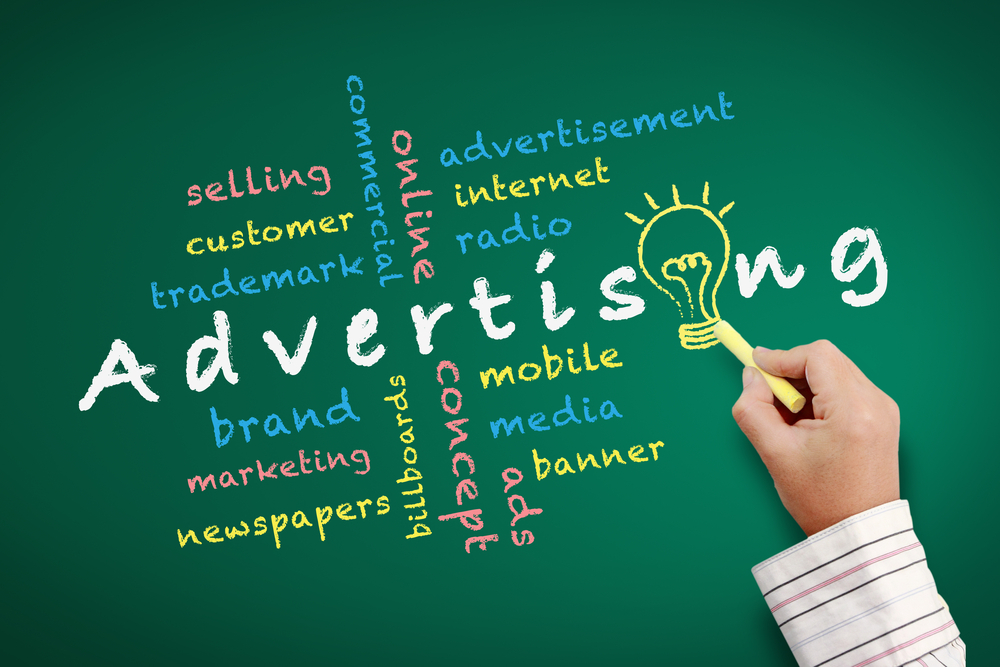

### Advertising Sales Channel Prediction

### Problem Statement:

#### Sales Channel Prediction Case Study  

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


Observations:
    dataset has 5 columns which contains both features and one target variable. Sales being the target variable which contains continuous data so it is a regression type problem. Features are advertising dollars spent on TV, radio and newspaper. So in order to improve the sales, we are advertising on the mentioned features.

Also the column Unnamed is taken on the basis of index purpose, so it has no relation with our target variable. On this basis while general feature selection, this will be removed.

### Exploratory Data Analysis

### Feature Selection on General Basics

In [3]:
# Dropping the irrelevant column Unnamed:0 as it show no relation.
df.drop("Unnamed: 0",axis=1, inplace=True)

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.shape

(200, 4)

We have 200 rows and 4 columns. In the 4 columns, 3 are feature and 1 is target

In [6]:
#Getting an overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Observation: Here it clearly shows that there is no null values and also the data types are all float(numeric)m

In [7]:
#Checking the number of unique values in the features
df.nunique()

TV           190
radio        167
newspaper    172
sales        121
dtype: int64

In [8]:
#checking the uniqueness of the target
df['sales'].unique()

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. ,  5.6,
       15.5, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,  9.5, 12.8,
       25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7,  8.5, 14.9, 23.2, 14.8,
       11.4, 10.7, 22.6, 21.2, 20.2, 23.7,  5.5, 23.8, 18.4,  8.1, 24.2,
       15.7, 14. , 13.4, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 12.3, 13.6, 21.7, 15.2, 16. , 16.7, 11.2,  7.3, 19.4,
       22.2, 11.5, 16.9, 11.7, 17.2, 19.2, 19.8, 21.8, 14.1, 12.6, 12.2,
        9.4,  6.6,  7. , 11.6, 19.7, 24.7,  1.6, 12.7,  5.7, 19.6, 10.8,
       20.8, 10.9, 20.1, 10.3, 16.1, 15.6,  3.2, 15.3, 14.4, 13.3,  8. ,
        8.4, 14.5,  7.6, 27. , 26.2, 17.6, 17.3,  6.7,  9.9,  5.9, 25.5])

We can see the unique values in the target

In [9]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

We have rechecked by isnull function and there is no null values

<AxesSubplot:>

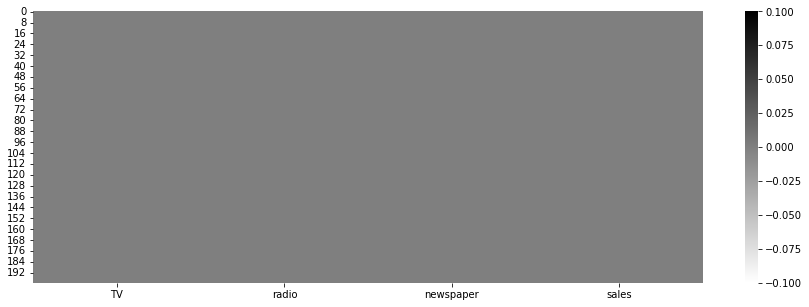

In [10]:
#Lets look into a heatmap for better visualization of the null values
plt.figure(figsize=(15,5))

sns.heatmap(df.isnull(),cmap='binary')

We can clearly visualize there is no null values

In [11]:
# checking the columns in the dataset
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

We can see all the column names here and the datatype of all columns as 'object'.

## Statistical overview of the Dataset

In [12]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Observations: 

The count of all the columns are same, hence we can see that the data is balanced

The mean of TV is higher in comparision to others hence we can assume that the sales generated from TV is higher

We also see 0 min data, which indicates that there may be outliers and skewness in the dataset

# Data Visualization

### Checking how the dataset is distributed

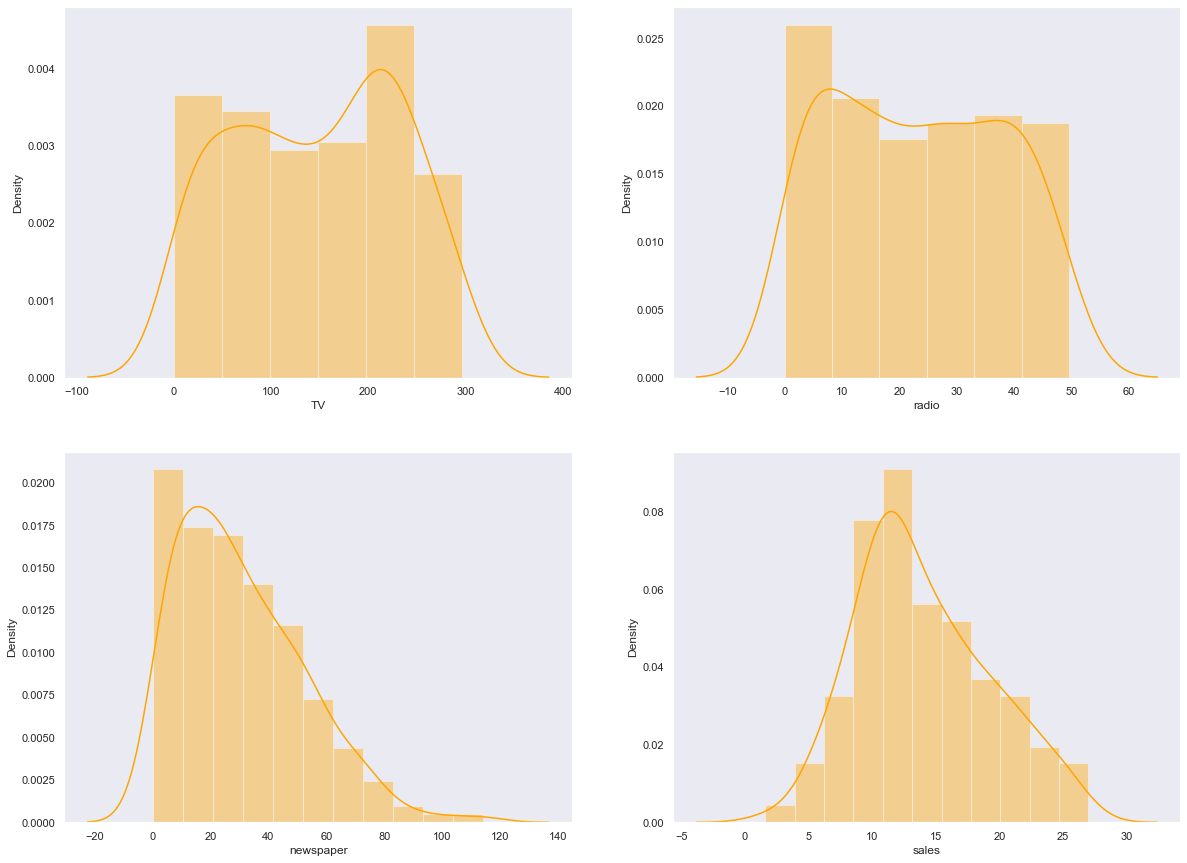

In [13]:
sns.set(style="dark")

plt.figure(figsize=(20,15))
plotnumber=1

for column in df:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[column],color='orange')
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.show()

Observations:

TV: Looks normally distributed and also see left skewness

Radio: Data looks normally distributed

Newspaper: Data look skewed left

Sales: Looks normally distributed

### Visualizing the relationship between the features and the label 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='newspaper', ylabel='sales'>

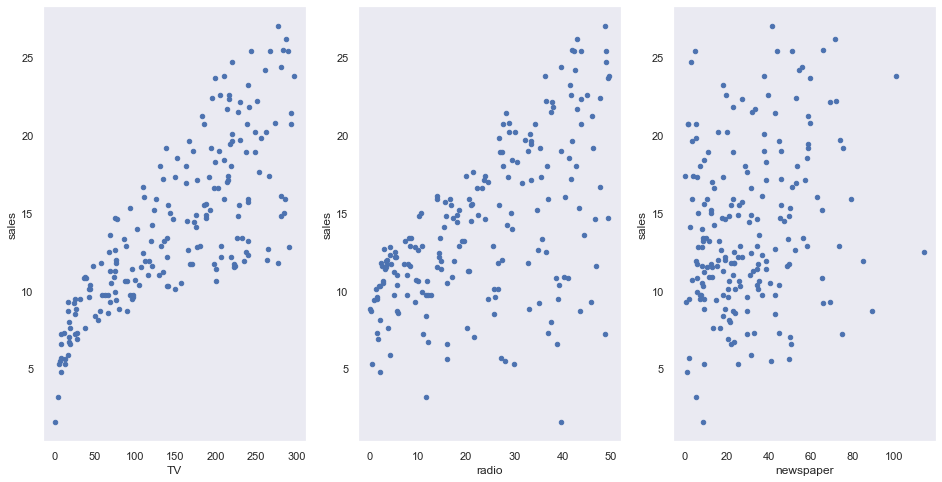

In [14]:
fig, axs = plt.subplots(1,3)

df.plot(x = "TV", y = "sales", kind = "scatter", ax=axs[0], figsize = (16,8))
df.plot(x = "radio", y = "sales", kind = "scatter", ax=axs[1])
df.plot(x = "newspaper", y = "sales", kind = "scatter", ax=axs[2])

Observation:

TV: Show an upward trending relation

Radio: Shows an upward trending relation, though it has some outliers

Newspaper: Shows no trend and the data is scattered

### Lets also see the trend for sales if the advertisement mediums are combined, to see the contribution of newspaper

<AxesSubplot:title={'center':'Comparison between radio and newspaper'}, xlabel='radio', ylabel='newspaper'>

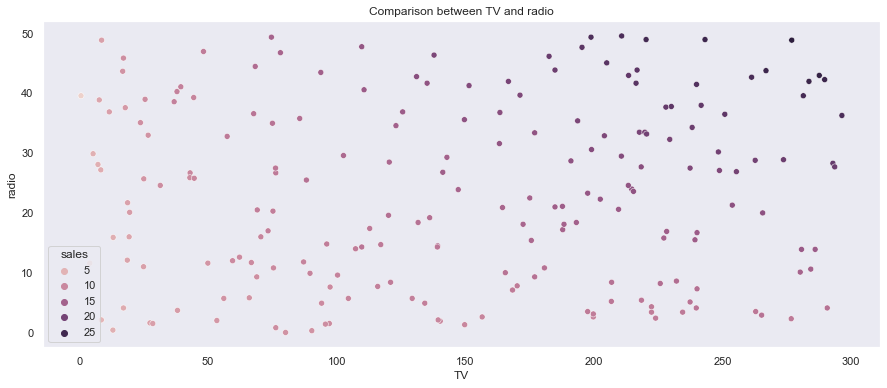

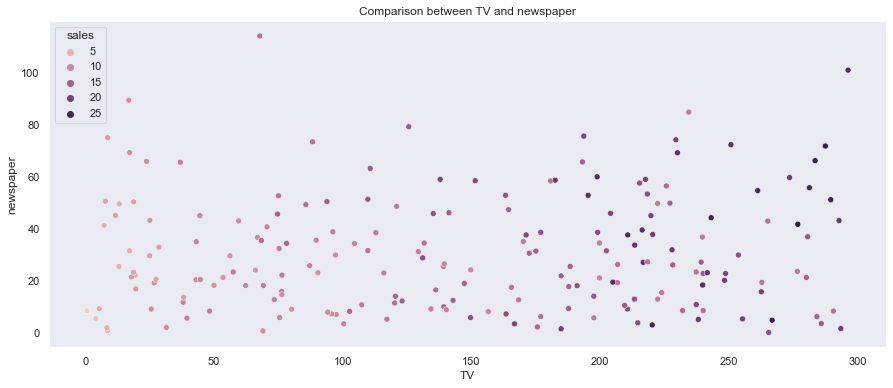

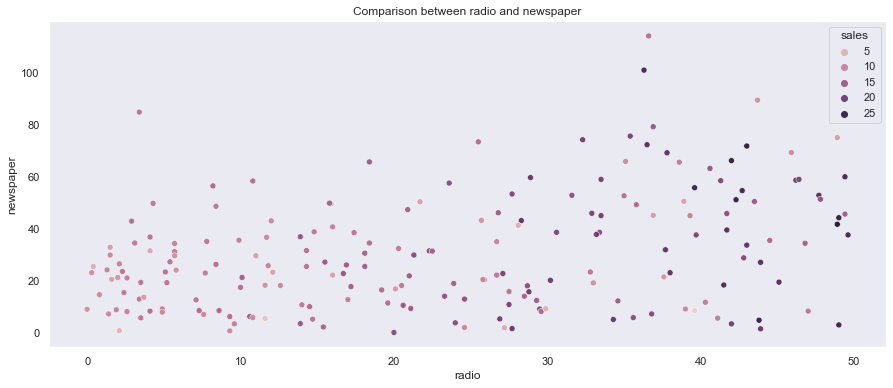

In [15]:
#TV and Radio
plt.figure(figsize=[15,6])
plt.title('Comparison between TV and radio')
sns.scatterplot(df['TV'],df['radio'],hue=df["sales"])

#TV and newspaper
plt.figure(figsize=[15,6])
plt.title('Comparison between TV and newspaper')
sns.scatterplot(df['TV'],df['newspaper'],hue=df["sales"])

#Radio and Newspaper
plt.figure(figsize=[15,6])
plt.title('Comparison between radio and newspaper')
sns.scatterplot(df['radio'],df['newspaper'],hue=df["sales"])

Observations:
    
We can clearly see from the above plots that the major contribution for sales seems to be from TV and Radio

When TV and newspaper are combined, the results are not that great and also shows outliers

When Radio and newspaper is combined the results are even worse with more outliers

### Checking the corelation between the features and also the feature and label

In [16]:
corr = df.corr()
corr

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


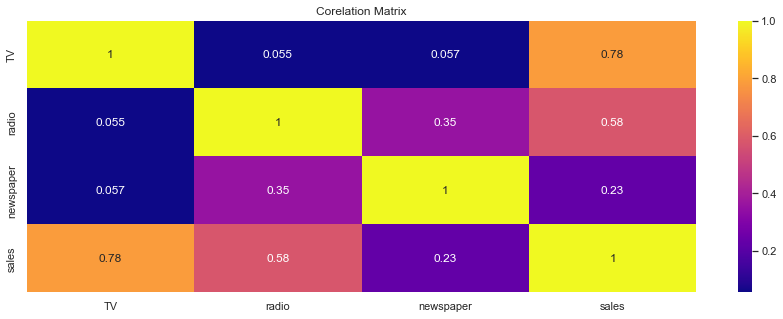

In [17]:
plt.figure(figsize=[15,5])
sns.heatmap(corr,annot=True,linecolor='white',cmap='plasma')
plt.title('Corelation Matrix')
plt.show()

Observations:

TV shows 78% corealtion with sales

Radio shows 58% corelation with sales

Newspaper shows only 23% corelation with sales

Features has no major corelation with each other

### Identifying outliers

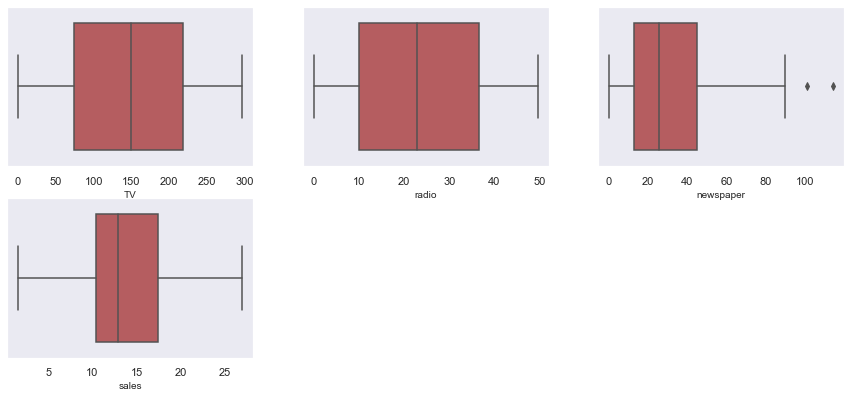

In [18]:
plt.figure(figsize = (15,10))
graph=1

for columns in df:
    if graph<=5:
        ax=plt.subplot(3,3,graph)
        sns.boxplot(df[columns],orient='v',color='r')
        plt.xlabel(columns,fontsize=10)
    graph+=1
plt.show() 

Observation:

Newspaper shows outliers

### Removing Outliers Using Z Score Method

In [19]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [20]:
x=df[['newspaper']]

In [21]:
z=np.abs(zscore(x))

new_df=df[(z<3).all(axis=1)]
new_df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [22]:
df.shape

(200, 4)

In [23]:
new_df.shape

(198, 4)

The new dataframe has 198 rows and earlier it was 200, hence the outliers are removed

### Checking for skewness

In [24]:
new_df.skew().sort_values()

TV          -0.082332
radio        0.114842
sales        0.407130
newspaper    0.650112
dtype: float64

### Removing Skewness(Power Transform)

In [25]:
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [26]:
variable =['newspaper']

In [27]:
new_df[variable] = scaler.fit_transform(new_df[variable].values)
new_df[variable]

,newspaper
0,1.604196
1,0.831044
2,1.607052
3,1.283768
4,1.280622
...,...
195,-0.687435
196,-1.146090
197,-1.314437
198,1.517395


In [28]:
new_df.skew().sort_values()

newspaper   -0.101288
TV          -0.082332
radio        0.114842
sales        0.407130
dtype: float64

The skewness has been removed

## Preprocessing the Data

#### Splitting the data into feature and label

In [29]:
x=new_df.drop('sales',axis=1) #x value is for the features
y=new_df['sales']             #y value is for the target

In [30]:
x.head()

,TV,radio,newspaper
0,230.1,37.8,1.604196
1,44.5,39.3,0.831044
2,17.2,45.9,1.607052
3,151.5,41.3,1.283768
4,180.8,10.8,1.280622


### Scalling the data using StandardScaler

In [31]:
scaler=StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x_scaled

,TV,radio,newspaper
0,0.978697,0.989521,1.604196
1,-1.199012,1.090705,0.831044
2,-1.519332,1.535913,1.607052
3,0.056456,1.225616,1.283768
4,0.400243,-0.831784,1.280622
...,...,...,...
193,-1.272932,-1.310720,-0.687435
194,-0.615864,-1.229773,-1.146090
195,0.355657,-0.932968,-1.314437
196,1.606431,1.272836,1.517395


The data has been now scalled and ready for model building

### Modelling

### Identifying the best random_state

In [32]:
maxAccu=0
maxRS=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=.30, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.9425912979046436  on Random_state  444


In [33]:
# Train test split based on the best Random State

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.30,random_state=maxRS)

### Linear Regression

In [34]:
lr=LinearRegression() #initializing linear regression
lr.fit(x_train, y_train) #training the model

#predicting
pred=lr.predict(x_test)
print('R2 Score',r2_score(y_test,pred))

R2 Score 0.9425912979046436


Linear Regression R2Score= 94%

In [35]:
#(MAE)
print('MAE:',metrics.mean_absolute_error(y_test, pred))

#(MSE)
print('MSE:',metrics.mean_squared_error(y_test, pred))

#(RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.9514390448864892
MSE: 1.3808929733400113
RMSE: 1.1751140256758112


### Multiple Linear Regression with Ridge

In [36]:
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [37]:
ridgecv.alpha_

ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

ridge_model.score(x_test,y_test)

0.9425906743522147

### Multiple Linear Regression with Lasso

In [38]:
lasscv=LassoCV(alphas=None,max_iter=1000, normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [39]:
alpha=lasscv.alpha_
alpha

0.005668491850205613

In [40]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.005668491850205613)

In [41]:
lasso_reg.score(x_test,y_test)

0.9424860883796283

### Random Forest Regressor

In [42]:
# Checking R2 score for Random Forest Regressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

# prediction
predrf=rf.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predrf))

R2_Score: 0.9748222917681949


In [43]:
# MAE
print(metrics.mean_absolute_error(y_test, predrf))

#MSE
print(metrics.mean_squared_error(y_test, predrf))

#RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, predrf)))

0.5869333333333314
0.605617599999998
0.7782143663541543


### Decision Tree Regressor

In [44]:
tree=DecisionTreeRegressor()
tree.fit(x_train,y_train)

# prediction
pred_tree=tree.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,pred_tree))

R2_Score: 0.9415960107814221


In [45]:
#MAE

print(metrics.mean_absolute_error(y_test, pred_tree))

#MSE
print(metrics.mean_absolute_error(y_test, pred_tree))

#RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, pred_tree)))

0.9183333333333334
0.9183333333333334
1.185256652937807


### Support Vector Regressor

In [46]:
svr=SVR()
svr.fit(x_train,y_train)

#prediction
predsvr=svr.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predsvr))

R2_Score: 0.9203337532446152


In [47]:
#MAE
print(metrics.mean_absolute_error(y_test, predsvr))

#MSE
print(metrics.mean_squared_error(y_test, predsvr))

#RMSE
print(metrics.mean_squared_error(y_test, predsvr))

0.8525564428926046
1.9162697699410385
1.9162697699410385


### Cross Validation

In [48]:
#Linear Regression
print('Linear_Regression:',cross_val_score(lr,x_scaled,y,cv=5).mean())

#RidgeRegression
print('Ridge_Regression:',cross_val_score(ridge_model,x_scaled,y,cv=5).mean())
      
#Lasso Regression
print('Lasso_Regression:',cross_val_score(lasso_reg,x_scaled,y,cv=5).mean())

#Random Forest
print('RandomForest:',cross_val_score(rf,x_scaled, y, cv=5).mean())

#Descission Tree
print('Decission_Tree:',cross_val_score(tree,x_scaled,y,cv=5).mean())

#Support Vector Regressor
print('Support_Vector:',cross_val_score(svr,x_scaled,y,cv=5).mean())

Linear_Regression: 0.8857739370001966
Ridge_Regression: 0.885774059631577
Lasso_Regression: 0.8859088169559881
RandomForest: 0.9752205087679251
Decission_Tree: 0.9504445411553128
Support_Vector: 0.9036275725678571


Observation: 
    
After the cross validation of all the 6 models created, we see that 'Random Forest' is the best fit model.

We will do Hyper Parameter Tuning of the best fit model

### Hyper Parameter Tuning

In [49]:
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,200],
             'max_depth':[2,4,6]}

In [50]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [51]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [52]:
GCV.best_params_

{'criterion': 'mae',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 200}

In [53]:
Adv_sales = RandomForestRegressor(criterion='mae', max_depth=6, max_features='auto', n_estimators=200)
Adv_sales.fit(x_train, y_train)
pred = Adv_sales.predict(x_test)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, predrf)))
print('R2_Score:',r2_score(y_test,pred)*100)

RMSE value: 0.7782143663541543
R2_Score: 97.73951595473788


Note: After doing the HyperParemeter Tuning of the RandomForestRegressor Model, getting a score of 97.73%, which is a good score

### Saving the best model

In [54]:
import joblib
joblib.dump(Adv_sales,"Adv_Sales_Channel.pkl")

['Adv_Sales_Channel.pkl']